# Dataset

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Preprocesamiento

In [44]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [45]:
X = df.drop('charges', axis=1)
y = df['charges']

In [46]:
X.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [48]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)
ct.fit(X)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [49]:
X = ct.transform(X)

In [50]:
print(X.shape)
print(X)

(1338, 11)
[[0.02173913 0.3212268  0.         ... 0.         0.         1.        ]
 [0.         0.47914985 0.2        ... 0.         1.         0.        ]
 [0.2173913  0.45843422 0.6        ... 0.         1.         0.        ]
 ...
 [0.         0.56201238 0.         ... 0.         1.         0.        ]
 [0.06521739 0.26472962 0.         ... 0.         0.         1.        ]
 [0.93478261 0.35270379 0.         ... 1.         0.         0.        ]]


# Entrenamiento

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 11) (268, 11) (1070,) (268,)


In [54]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, Input
from keras.layers import Dense

In [58]:
tf.random.set_seed(42)

model = Sequential([
    Dense(256, input_shape=(11,)),
    Dense(64),
    Dense(1)
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               3072      
                                                                 
 dense_19 (Dense)            (None, 64)                16448     
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 19,585
Trainable params: 19,585
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [60]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13195.1680 - mae: 13195.1680
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 11229.5381 - mae: 11229.5381
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 6250.1938 - mae: 6250.1938
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 5448.2505 - mae: 5448.2505
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 5248.7456 - mae: 5248.7456
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 5233.0947 - mae: 5233.0947
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 5276.9951 - mae: 5276.9951
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 5121.4741 - mae: 5121.4741
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 4478.3101 - mae: 4478.3101
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 5241.3721 - mae: 5241.

In [61]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5227.4814 - mae: 5227.4814


[5227.4814453125, 5227.4814453125]

<Axes: >

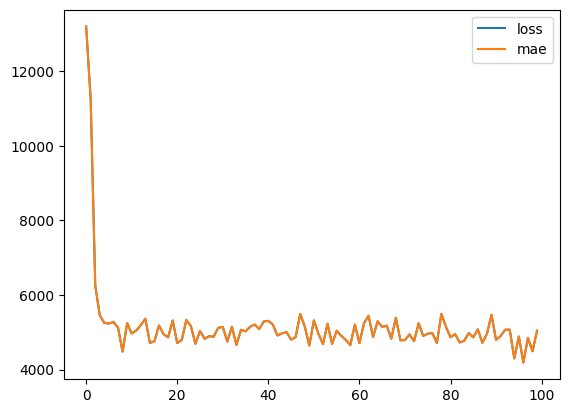

In [62]:
pd.DataFrame(history.history).plot()

In [63]:
tf.random.set_seed(42)

model = Sequential([
    Dense(256, input_shape=(11,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='relu')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               3072      
                                                                 
 dense_22 (Dense)            (None, 64)                16448     
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 19,585
Trainable params: 19,585
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

In [68]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 3ms/step - loss: 3201.7236 - mae: 3201.7236
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 3204.5452 - mae: 3204.5452
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 3200.6750 - mae: 3200.6750
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 3201.6113 - mae: 3201.6113
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 3204.7529 - mae: 3204.7529
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 3199.4600 - mae: 3199.4600
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 3200.2671 - mae: 3200.2671
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 3198.7795 - mae: 3198.7795
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 3197.7871 - mae: 3197.7871
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 3197.3528 - mae: 3197.3528

In [69]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2612.4858 - mae: 2612.4858


[2612.48583984375, 2612.48583984375]

<Axes: >

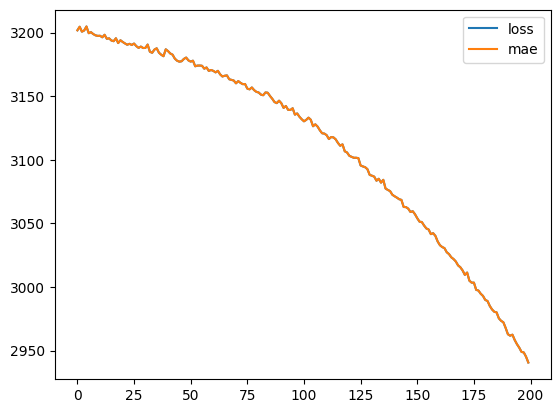

In [70]:
pd.DataFrame(history.history).plot()